# CNN Model for American Sign Language Recognition

#### NOTE: Please ensure that all packages or Libraries are installed

In [2]:
!pip install cvzone

  Created wheel for cvzone: filename=cvzone-1.5.6-py3-none-any.whl size=18768 sha256=5b0dd35154599d279a1cab5ca3fbb3247da8b876cd5148397ca43461ba9bb1c4
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6f\ec\e5\c576c2f2fa138207498bbbfc8eefb1f0a2efbba7c847742948
Successfully built cvzone


# 1. Import Dependencies & Set Directories

In [2]:
import os
import cv2
import numpy as np
import math
import time
import json
import tensorflow
from sklearn.model_selection import train_test_split
from cvzone.ClassificationModule import Classifier
from cvzone.HandTrackingModule import HandDetector
from tensorflow.keras.utils import to_categorical
from IPython.display import clear_output
from string import digits
from pathlib import Path

cwd = os.getcwd()
print(cwd)

C:\Users\User\Desktop\FYP ASL Project\Project Folder\CNN Model


<br>Similar to the process in the LSTM Model, once you have identified your desired camera port to use in this applicaiton, set the prefered port to be used throughout the program below. <br>
**cameraPort = setCameraPort( [Change Number Here] )**

In [3]:
def setCameraPort(portNumber = 0):
    cameraPort = portNumber
    return cameraPort

cameraPort = setCameraPort(1)
print(f'Camera port set to: {cameraPort}')

Camera port set to: 1


# 2. Video Streaming

In [4]:
def process_Video(offset, imgSize, numHand, img, hands):   
    hand = hands[numHand]
    x_border, y_border, width, height = hand['bbox']

    backGround = np.ones((imgSize, imgSize, 3), np.uint8) * 255
    resizedImage = img[y_border - offset:y_border + height + offset, x_border - offset:x_border + width + offset]

    resizedImageShape = resizedImage.shape

    aspectRatio = height / width

    if aspectRatio > 1:
        constant = imgSize / height
        width_Calculation = math.ceil(constant * width)
        imgResize = cv2.resize(resizedImage, (width_Calculation, imgSize))
        imgResizeShape = imgResize.shape
        width_Gap = math.ceil((imgSize - width_Calculation) / 2)
        backGround[:, width_Gap:width_Calculation + width_Gap] = imgResize

    else:
        constant = imgSize / width
        height_Calculation = math.ceil(constant * height)
        imgResize = cv2.resize(resizedImage, (imgSize, height_Calculation))
        imgResizeShape = imgResize.shape
        height_Gap = math.ceil((imgSize - height_Calculation) / 2)
        backGround[height_Gap:height_Calculation + height_Gap, :] = imgResize

    return backGround

In [5]:
cap = cv2.VideoCapture(cameraPort)
detector = HandDetector(maxHands=2)

while cap.isOpened():
    success, img = cap.read()
    hands, img = detector.findHands(img)
    try:
        backGround = np.ones((300, 300, 3), np.uint8) * 255
        if hands:
            if len(hands) == 1:
                one_Hand = process_Video(20, 300, 0, img, hands)
                img = cv2.vconcat([one_Hand, backGround])
            else:
                left_Hand = process_Video(20, 300, 0, img, hands)
                right_Hand = process_Video(20, 300, 1, img, hands)
                img = cv2.vconcat([left_Hand, right_Hand])
            cv2.imshow("ImageWhite", img)

        # Break when pressed 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    except Exception as e:
        clear_output(wait=True)
        print(e)
        print("Please ensure at least 2 feet away from camera")
        continue
cap.release()
cv2.destroyAllWindows()

# 3. Video Data Collection

In [6]:
def record_Video(DATASET_PATH):
    #Capture video from webcam
    vid_capture = cv2.VideoCapture(cameraPort)
    vid_cod = cv2.VideoWriter_fourcc(*'XVID')
    output = cv2.VideoWriter(DATASET_PATH, vid_cod, 30.0, (1280,720))
    vid_capture.set(3,1280)
    vid_capture.set(4,720)
    numberOfFrames = 0
    while(numberOfFrames < 1000):
        # Capture each frame of webcam video
        ret,frame = vid_capture.read()
        cv2.imshow("My Video Feed", frame)
        output.write(frame)
        numberOfFrames = numberOfFrames + 1

        # Close and break the loop after pressing "x" key
        if cv2.waitKey(10) &0XFF == ord('x'):           
            break
            
    cv2.waitKey(0)
    # close the already opened camera
    vid_capture.release()
    # close the already opened file
    output.release()
    # close the window and de-allocate any associated memory usage
    cv2.destroyAllWindows()

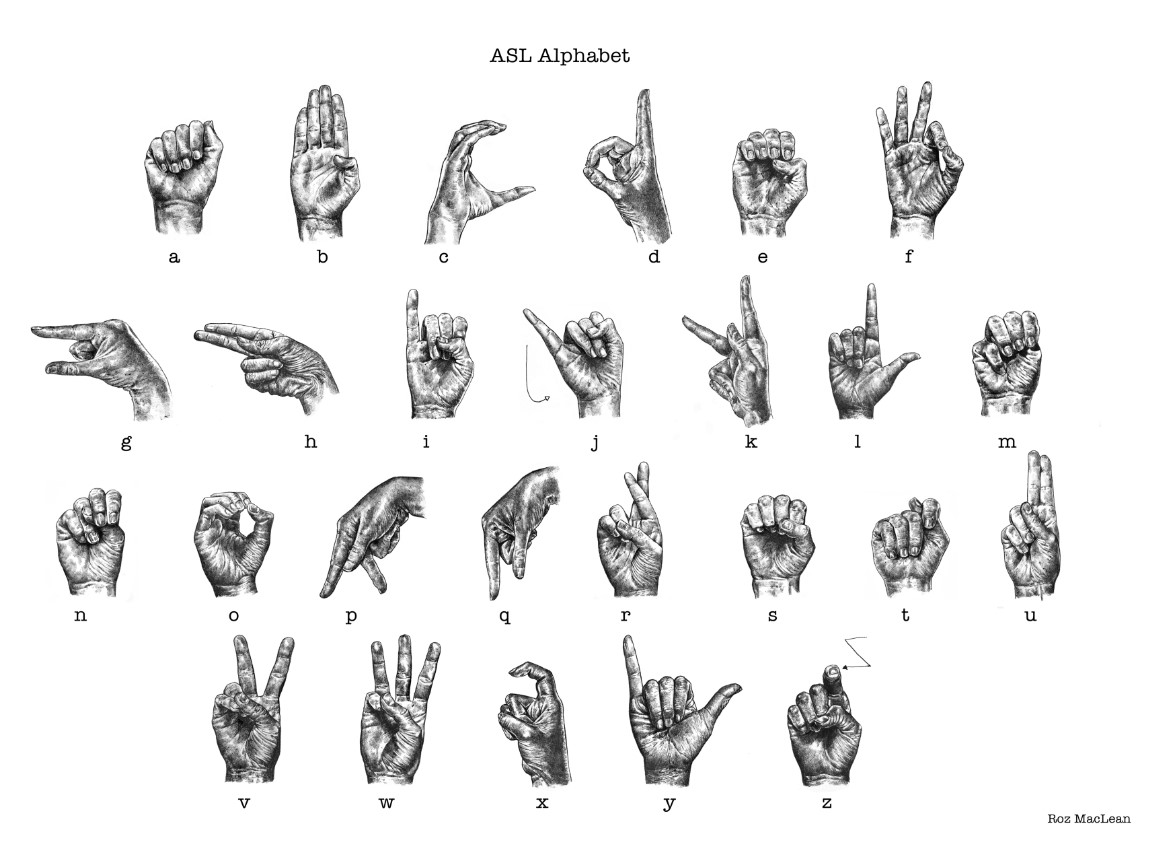 <br> (Maclean, 2016)

In [15]:
for word in ['Whats']:
    outside = os.path.normpath(cwd + os.sep + os.pardir)
    videoDirectory = os.path.join(outside, 'Dataset', 'Alphabet', 'video', word)
    Path(videoDirectory).mkdir(parents=True, exist_ok=True)
    for videoNumber in range(1):
        PathDirectory = os.path.join(videoDirectory, "video_"+str(videoNumber+1)+".mp4")
        record_Video(PathDirectory)
print("[Data Collection Completed]")

[Data Collection Completed]


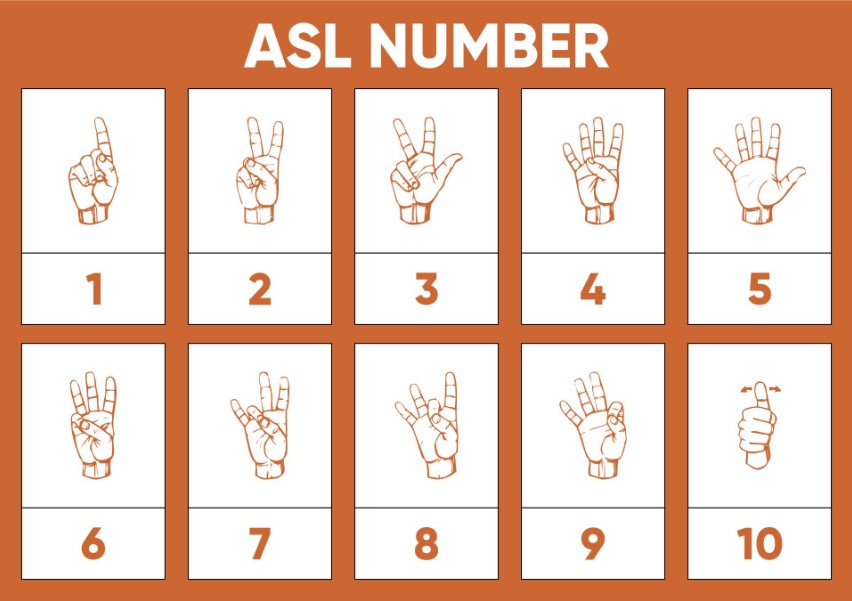 <br> (printablee, 2020)

In [188]:
for word in ['10']:
    outside = os.path.normpath(cwd + os.sep + os.pardir)
    videoDirectory = os.path.join(outside, 'Dataset', 'Number', 'video', word)
    Path(videoDirectory).mkdir(parents=True, exist_ok=True)
    for videoNumber in range(1):
        PathDirectory = os.path.join(videoDirectory, "video_"+str(videoNumber+1)+".mp4")
        record_Video(PathDirectory)
print("[Data Collection Completed]")

[Data Collection Completed]


# 4. Capture Image Data from Video

In [13]:
def extractImageData(imgFolder, videoDirectory):
    cap = cv2.VideoCapture(videoDirectory)
    detector = HandDetector(maxHands=2)

    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    videoDuration = 0
    # White Background
    #backGround = np.ones((300, 300, 3), np.uint8) * 255
    while True:
        try:
            ret, img = cap.read()
            hands, img = detector.findHands(img)

            if hands:
                if len(hands) == 1:
                    one_Hand = process_Video(20, 300, 0, img, hands)
                    img = cv2.vconcat([one_Hand, one_Hand])
                else:
                    left_Hand = process_Video(20, 300, 0, img, hands)
                    right_Hand = process_Video(20, 300, 1, img, hands)
                    img = cv2.vconcat([left_Hand, right_Hand])

                cv2.imshow("ImageWhite", img)
                videoDuration = videoDuration + 1
                if cv2.waitKey(1) & 0xFF == ord('q') or ret==False or videoDuration >= length - 1 or videoDuration >= 2000:
                    cap.release()
                    cv2.destroyAllWindows()
                    print("Completed!")
                    break
                else:
                    cv2.imwrite(os.path.join(imgFolder,f'Img_Frame_{videoDuration}.jpg'),img)
                    
        except Exception as e:
            videoDuration = videoDuration + 1
            if cv2.waitKey(1) & 0xFF == ord('q') or ret==False or videoDuration >= length - 1 or videoDuration >= 2000:
                cap.release()
                cv2.destroyAllWindows()
                print("Completed!")
                break
            else:
                #print(e)
                #print("Please ensure at least 2 feet away from camera")
                #print(f'Frame lost: {videoDuration}')
                continue
            
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
Route = 'Alphabet'
modelName = 'Vocabulary CNN Model'
outside = os.path.normpath(cwd + os.sep + os.pardir)
videoDirectory = os.path.join(outside, 'Dataset', Route, 'video')
VideoDataset = os.listdir(videoDirectory)
for video in VideoDataset:

    imgFolder = os.path.join(cwd, modelName, 'images', video)
    videoDirectory = os.path.join(outside, 'Dataset', Route, 'video', video, "video_1.mp4")
    
    isExist = os.path.exists(imgFolder)
    if isExist == True:
        print("Word {" + video + "} has already been processed!")
    else:
        Path(imgFolder).mkdir(parents=True, exist_ok=True)
        print(imgFolder)
        print(videoDirectory)
        extractImageData(imgFolder, videoDirectory)
        print("==================")

## WLASL

### WLASL Loading Dataset

In [140]:
def Convert(string):
    li = list(string.split("\n"))
    return li

In [141]:
# List of missing video data from WLASL
def get_missingWLASLVideoList(path):
    with open(path) as f:
        missingVideoID = f.read()
        missingVideoIDList = Convert(missingVideoID)
        f.close()
        return missingVideoIDList

In [142]:
outside = os.path.normpath(cwd + os.sep + os.pardir)
WLASL_filePath = os.path.join(outside, 'Dataset','WLASL')
json_filePath = os.path.join(WLASL_filePath, 'WLASL_v0.3.json')

# returns JSON object as 
data = json.load(open(json_filePath))
missingVideoIDList = get_missingWLASLVideoList(os.path.join(WLASL_filePath, 'missing.txt'))

In [143]:
word,videoName,videoPath = [],[],[]

WLASL_VideoPath = os.path.join(WLASL_filePath, 'Vocabulary', 'videos')
print("Processing")
for i in range(0,5):
    print(data[i]['gloss'])
    for j in range(0,len(data[i]['instances'])):
        vid_ID = str(data[i]['instances'][j]['video_id'])
        # Check if there are any missing videos not present in missing data list
        if vid_ID not in missingVideoIDList and vid_ID is not None:
            vidPath = os.path.join(WLASL_VideoPath, vid_ID + ".mp4")
            isdir = os.path.exists(vidPath)           
            if isdir == True:
                word.append(data[i]['gloss'])
                videoName.append(vid_ID)
                videoPath.append(vidPath)
            else:
                print(" *** Missing: " + vid_ID + " *** ")
        
    print("==================================")
print(" *** Finished *** ")

Processing
book
 *** Missing: 07074 *** 
drink
computer
before
chair
 *** Finished *** 


In [144]:
# Select only the first 3 videos of any related word (Save computation time)
def cut_DownDF(df):
    df_append = pd.DataFrame()
    for i in df['Word'].unique():
        x = df[df['Word']==i].head(1)
        df_append = pd.concat([df_append, x])
    return df_append

In [145]:
# initialize data of lists.
dfData = {'Word': word,
        'Video_ID': videoName,
        'Video_Path': videoPath
       }
  
# Create DataFrame
WLASL_df = pd.DataFrame(dfData)
WLASL_df.columns =[column.replace(" ", "_") for column in WLASL_df.columns]
WLASL_df = cut_DownDF(WLASL_df)
# Print the output.
WLASL_df

,Word,Video_ID,Video_Path
0,book,69241,C:\Users\User\Desktop\FYP ASL Project\Project ...
5,drink,69302,C:\Users\User\Desktop\FYP ASL Project\Project ...
20,computer,12328,C:\Users\User\Desktop\FYP ASL Project\Project ...
34,before,05728,C:\Users\User\Desktop\FYP ASL Project\Project ...
50,chair,09848,C:\Users\User\Desktop\FYP ASL Project\Project ...


# WLASL Dataset feature extraction

In [148]:
#C:\Users\User\Desktop\FYP ASL Project\Project Folder\CNN Model\images
imgFolder = os.path.join(cwd,'images', 'word')
print(imgFolder)

C:\Users\User\Desktop\FYP ASL Project\Project Folder\CNN Model\images\word


In [149]:
Route = 'WLASL'
modelName = 'Vocabulary CNN Model'


wordList = list(WLASL_df.Word.unique())
for word in wordList:
    isExist = os.path.exists(os.path.join(cwd, modelName, 'images', word))
    # Move on to next word if videos had already been processed
    if isExist == True:
        print("Word {" + word + "} has already been processed!")
    else:
        df = WLASL_df.copy(deep=False)
        df.query(f'Word == "{word}"',inplace = True)
        for videoDirectory in df['Video_Path'].tolist():
            #print(os.path.join(cwd, 'Dataset', 'Alphabet', 'video', video+".mp4"))
            imgFolder = os.path.join(cwd, modelName, 'images', word)

            Path(imgFolder).mkdir(parents=True, exist_ok=True)
            print(imgFolder)
            extractImageData(imgFolder, videoDirectory)
            print("==================")


C:\Users\User\Desktop\FYP ASL Project\Project Folder\CNN Model\images\book
[Data Collection Completed]
C:\Users\User\Desktop\FYP ASL Project\Project Folder\CNN Model\images\drink
[Data Collection Completed]
C:\Users\User\Desktop\FYP ASL Project\Project Folder\CNN Model\images\computer
Completed!
C:\Users\User\Desktop\FYP ASL Project\Project Folder\CNN Model\images\before
[Data Collection Completed]
C:\Users\User\Desktop\FYP ASL Project\Project Folder\CNN Model\images\chair
[Data Collection Completed]


# Model Training on Google Teachable Machine

Since we are computing on a large dataset of images, additional computing resources is needed from Google's Teachable Machine <br> hosted and trained on the cloud, the trained model would be downloaded and evaluated in the following steps.

Select open with Google Teachable Machine with the link below, number of epochs are set to 500,<br> learning rate and batch number remains at default settings

[Vocabulary Model Link] : https://drive.google.com/file/d/1UKVAYu_PQmMd6LFOMuLmFyrCJSbEPamQ/view?usp=share_link <br>
[Alphabet and Number Link] : https://drive.google.com/file/d/1V0_CbtBbxxr-PPJXxQDl7yitPsD11pau/view?usp=share_link

# Model Evaluation and Analysis

In [7]:
def get_Labels(modelName):
    label_Path = os.path.join(cwd, modelName, 'labels.txt')
    myLabels = []
    with open(label_Path) as f:
        lines = f.readlines()
        for label in lines:
            myLabels.append(label.strip())

    return myLabels

In [8]:
def loadTrainingData(modelName):
    data = np.load(os.path.join(cwd, modelName,'Data_Array.npy'))
    labels = np.load(os.path.join(cwd, modelName,'Training_Labels.npy'))

    print(data.shape)
    print(labels.shape)

    label_data = to_categorical(labels).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(data, label_data, test_size=0.4)
    return X_train, X_test, y_train, y_test

In [9]:
def get_ModelPrediction(X_test, modelName):
    res = []
    count = 0
    model = os.path.join(cwd, modelName, 'keras_model.h5')
    label_data = os.path.join(cwd, modelName, 'labels.txt')
    classifier = Classifier(model, label_data)
    for testImgPath in X_test:
        img = cv2.imread(testImgPath, cv2.IMREAD_ANYCOLOR)
        prediction, index = classifier.getPrediction(img, draw=False)
        count = count + 1
        clear_output(wait=True)
        print(f'Progress: [{count}/{len(X_test)}]')
        res.append(prediction)
    return res

In [10]:
def createTestData(modelName):
    wordList = get_Labels(modelName)

    dataArray, labels= [], []
    label_map = {label:num for num, label in enumerate(get_Labels(modelName))}

    for label in wordList:
        path = os.path.join(cwd, modelName, 'images', label)
        for img in os.listdir(path):
            dataArray.append(os.path.join(path, img))
            labels.append(label_map[label])

    np.save(os.path.join(cwd, modelName, 'Data_Array'), np.array(dataArray))
    np.save(os.path.join(cwd, modelName, 'Training_Labels'), np.array(labels))

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def show_StyledConfusionMatrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix of word: " + class_label)

## Remember to run this to load test data to perform Analysis

In [ ]:
# Available models to load ["Vocabulary CNN Model", "Number & Alphabet CNN Model"]
modelName = 'Vocabulary CNN Model'

X_train, X_test, y_train, y_test = loadTrainingData(modelName)
wordList = get_Labels(modelName)
yhat = get_ModelPrediction(X_test, modelName)

Only run this when creating new model

In [29]:
createTestData(modelName)

Progress: [3185/3185]


### Numbers and Alphabet recognition (13 categorical classes)

In [89]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error


count = 0
for i in range(len(y_test)):
    testValue = np.argmax(y_test[i])
    prediciton = np.argmax(yhat[i])
    if prediciton != testValue:
        count = count + 1
        print(f"Expected result: {wordList[testValue]}")
        print(f"Actual result: {wordList[prediciton]}")
#         print(f"Expected result: {np.argmax(y_test[i])}")
#         print(f"Actual result: {np.argmax(res[i])}")
        print("=============================")
        
print(f'Total number of false predictions: {count}/{len(y_test)}(Total predictions made)')

Expected result: 9
Actual result: 6
Expected result: 7
Actual result: 8
Expected result: 5
Actual result: 4
Expected result: 2
Actual result: 10
Expected result: 9
Actual result: 6
Expected result: 3
Actual result: 4
Expected result: 8
Actual result: 7
Expected result: 1
Actual result: 10
Expected result: 3
Actual result: 7
Expected result: 5
Actual result: 4
Expected result: 1
Actual result: 10
Expected result: 5
Actual result: 7
Expected result: 2
Actual result: 6
Expected result: 1
Actual result: 10
Expected result: 2
Actual result: 10
Expected result: 8
Actual result: 6
Expected result: 8
Actual result: 7
Expected result: 8
Actual result: 6
Expected result: 8
Actual result: 6
Expected result: 2
Actual result: 6
Expected result: 1
Actual result: 10
Expected result: 3
Actual result: 4
Expected result: 6
Actual result: 10
Expected result: 7
Actual result: 8
Expected result: 8
Actual result: 2
Expected result: 9
Actual result: 7
Expected result: 3
Actual result: 10
Expected result: 1
A

Expected result: A
Actual result: 8
Expected result: 3
Actual result: 4
Expected result: 6
Actual result: 8
Expected result: 7
Actual result: 10
Expected result: B
Actual result: 10
Expected result: 7
Actual result: 10
Expected result: 3
Actual result: 8
Expected result: 8
Actual result: 10
Expected result: 8
Actual result: 10
Expected result: 2
Actual result: 10
Expected result: 2
Actual result: 10
Expected result: A
Actual result: 4
Expected result: 5
Actual result: 4
Expected result: 2
Actual result: 10
Expected result: 7
Actual result: 10
Expected result: 1
Actual result: 10
Expected result: 3
Actual result: 10
Expected result: 8
Actual result: 6
Expected result: 2
Actual result: 10
Expected result: 9
Actual result: 7
Expected result: 1
Actual result: 10
Expected result: 9
Actual result: 8
Expected result: 6
Actual result: 2
Expected result: 2
Actual result: 10
Expected result: 5
Actual result: 4
Expected result: 7
Actual result: 10
Expected result: 5
Actual result: 4
Expected resu

Expected result: 2
Actual result: 10
Expected result: 2
Actual result: 6
Expected result: 1
Actual result: 10
Expected result: 2
Actual result: 6
Expected result: 9
Actual result: 8
Expected result: 5
Actual result: A
Expected result: 5
Actual result: 8
Expected result: 5
Actual result: 4
Expected result: 5
Actual result: 4
Expected result: 3
Actual result: 7
Expected result: 6
Actual result: 2
Expected result: 3
Actual result: 8
Expected result: 5
Actual result: 4
Expected result: 5
Actual result: 7
Expected result: 3
Actual result: 10
Expected result: 8
Actual result: 7
Expected result: 9
Actual result: 8
Expected result: 5
Actual result: 4
Expected result: 3
Actual result: 8
Expected result: 5
Actual result: 4
Expected result: 2
Actual result: 6
Expected result: 3
Actual result: 8
Expected result: 5
Actual result: 4
Expected result: 5
Actual result: 4
Expected result: 1
Actual result: 10
Expected result: 3
Actual result: 8
Expected result: 7
Actual result: 10
Expected result: 1
Actu

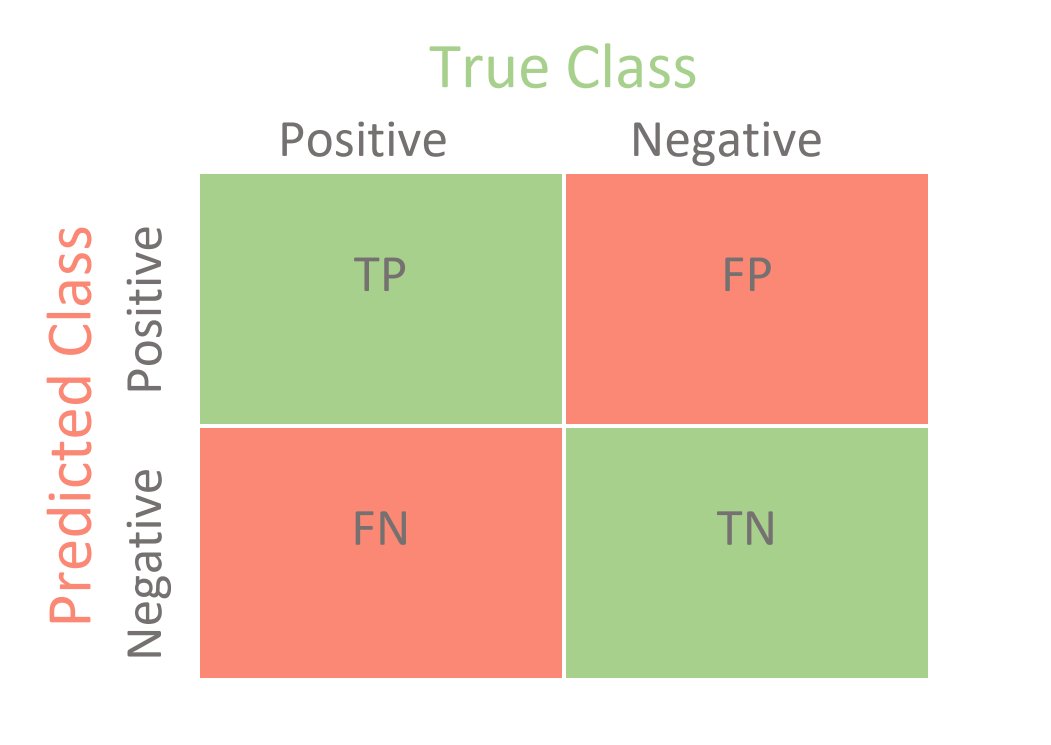 <br> (Vaddepally, 2021)

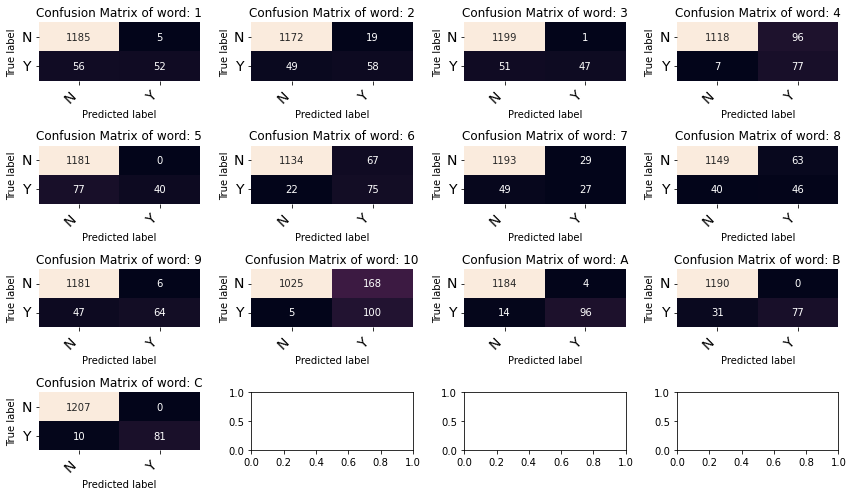

In [91]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

mlt_Cfm = multilabel_confusion_matrix(ytrue, yhat)

fig, ax = plt.subplots(4, 4, figsize=(12, 7))
  
for axes, Confusion_Matrix, label in zip(ax.flatten(), mlt_Cfm, wordList):
    show_StyledConfusionMatrix(Confusion_Matrix, axes, label, ["N", "Y"])

fig.tight_layout()
plt.show()

In [92]:
print("Mean Squared error: ", mean_squared_error(ytrue,yhat))

#average : string, [None, ‘binary’ (default), ‘micro’, ‘macro’, ‘samples’, ‘weighted’]
print(f'Model Accuracy Score: {round(accuracy_score(ytrue, yhat) * 100, 2)}%')
print(f"Precision: {precision_score(ytrue, yhat, average='micro')}")
print(f"Recall: {recall_score(ytrue, yhat, average='micro')}")
print(f"f1_score: {f1_score(ytrue, yhat, average='micro')}")

Mean Squared error:  7.825115562403698
Model Accuracy Score: 64.71%
Precision: 0.6471494607087828
Recall: 0.6471494607087828
f1_score: 0.6471494607087828


### Vocabulary Recognition (8 categorical classes)

In [32]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

count = 0
for i in range(len(y_test)):
    testValue = np.argmax(y_test[i])
    prediciton = np.argmax(yhat[i])
    if prediciton != testValue:
        count = count + 1
        print(f"Expected result: {wordList[testValue]}")
        print(f"Actual result: {wordList[prediciton]}")
#         print(f"Expected result: {np.argmax(y_test[i])}")
#         print(f"Actual result: {np.argmax(res[i])}")
        print("=============================")
        
print(f'Total number of false predictions: {count}/{len(y_test)}(Total predictions made)')

Expected result: Whats
Actual result: Nice
Expected result: Books
Actual result: Meet
Expected result: Nice
Actual result: You
Expected result: Books
Actual result: You
Expected result: Name
Actual result: Nice
Expected result: Name
Actual result: You
Expected result: I
Actual result: You
Expected result: I
Actual result: You
Expected result: Whats
Actual result: Name
Expected result: Books
Actual result: You
Expected result: Name
Actual result: You
Expected result: Whats
Actual result: Nice
Expected result: Whats
Actual result: Nice
Expected result: Read
Actual result: Nice
Expected result: Read
Actual result: Nice
Expected result: I
Actual result: You
Expected result: Books
Actual result: You
Expected result: Name
Actual result: Nice
Expected result: Read
Actual result: Name
Expected result: I
Actual result: You
Expected result: I
Actual result: You
Expected result: I
Actual result: Name
Expected result: Whats
Actual result: Nice
Expected result: Read
Actual result: Nice
Expected res

Actual result: Nice
Expected result: Read
Actual result: Nice
Expected result: I
Actual result: You
Expected result: Read
Actual result: Nice
Expected result: Whats
Actual result: Name
Expected result: I
Actual result: You
Expected result: Nice
Actual result: You
Expected result: Nice
Actual result: Whats
Expected result: Books
Actual result: You
Expected result: Meet
Actual result: You
Expected result: Whats
Actual result: Nice
Expected result: Read
Actual result: Name
Expected result: Books
Actual result: You
Expected result: Whats
Actual result: Nice
Expected result: Whats
Actual result: Nice
Expected result: Books
Actual result: You
Expected result: Books
Actual result: You
Expected result: Read
Actual result: Nice
Expected result: Read
Actual result: Nice
Expected result: I
Actual result: You
Expected result: Read
Actual result: Books
Expected result: Books
Actual result: You
Expected result: Whats
Actual result: Nice
Expected result: Read
Actual result: Nice
Expected result: Book

Expected result: Whats
Actual result: Name
Expected result: Name
Actual result: You
Expected result: Books
Actual result: You
Expected result: Books
Actual result: You
Expected result: Read
Actual result: Name
Expected result: Books
Actual result: You
Expected result: Whats
Actual result: Nice
Expected result: Whats
Actual result: Name
Expected result: Read
Actual result: Name
Expected result: Books
Actual result: You
Expected result: Name
Actual result: Nice
Expected result: Books
Actual result: You
Expected result: You
Actual result: Meet
Expected result: Books
Actual result: You
Expected result: Read
Actual result: Name
Expected result: I
Actual result: You
Expected result: Read
Actual result: Nice
Expected result: Books
Actual result: Meet
Expected result: Books
Actual result: You
Expected result: Name
Actual result: Nice
Expected result: I
Actual result: You
Expected result: Read
Actual result: Name
Expected result: Name
Actual result: Nice
Expected result: Nice
Actual result: You

Expected result: Whats
Actual result: Nice
Expected result: Name
Actual result: You
Expected result: Books
Actual result: You
Expected result: Read
Actual result: Whats
Expected result: Read
Actual result: Name
Expected result: Books
Actual result: You
Expected result: Read
Actual result: Name
Expected result: Books
Actual result: Nice
Expected result: Books
Actual result: You
Expected result: Books
Actual result: You
Expected result: Books
Actual result: You
Expected result: Name
Actual result: Nice
Expected result: Whats
Actual result: Nice
Expected result: Whats
Actual result: Nice
Expected result: Read
Actual result: Nice
Expected result: Name
Actual result: Nice
Expected result: Name
Actual result: You
Expected result: Books
Actual result: Nice
Expected result: Nice
Actual result: You
Expected result: I
Actual result: You
Expected result: Read
Actual result: Nice
Expected result: Books
Actual result: You
Expected result: Read
Actual result: Name
Expected result: Whats
Actual resul

Expected result: Books
Actual result: You
Expected result: Read
Actual result: Nice
Expected result: Name
Actual result: You
Expected result: I
Actual result: You
Expected result: Books
Actual result: You
Expected result: Books
Actual result: You
Expected result: Books
Actual result: You
Expected result: Whats
Actual result: Nice
Expected result: Read
Actual result: Name
Expected result: Books
Actual result: You
Expected result: Books
Actual result: You
Expected result: Books
Actual result: You
Expected result: Whats
Actual result: Nice
Expected result: Whats
Actual result: You
Expected result: Nice
Actual result: You
Expected result: I
Actual result: You
Expected result: Whats
Actual result: Name
Expected result: Books
Actual result: Meet
Expected result: Read
Actual result: Name
Expected result: Whats
Actual result: You
Expected result: Whats
Actual result: Nice
Expected result: Books
Actual result: You
Expected result: Nice
Actual result: Name
Expected result: Books
Actual result: Y

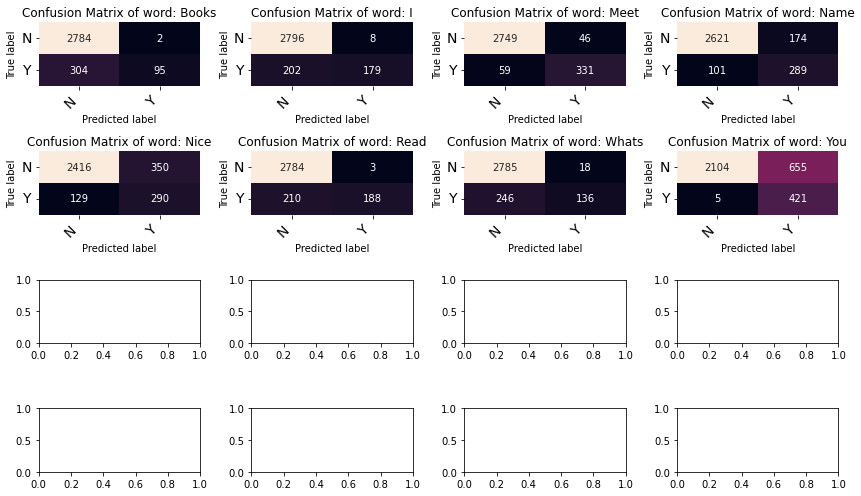

In [33]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

mlt_Cfm = multilabel_confusion_matrix(ytrue, yhat)

fig, ax = plt.subplots(4, 4, figsize=(12, 7))
  
for axes, Confusion_Matrix, label in zip(ax.flatten(), mlt_Cfm, wordList):
    show_StyledConfusionMatrix(Confusion_Matrix, axes, label, ["N", "Y"])

fig.tight_layout()
plt.show()

In [34]:
print("Mean Squared error: ", mean_squared_error(ytrue,yhat))

#average : string, [None, ‘binary’ (default), ‘micro’, ‘macro’, ‘samples’, ‘weighted’]
print(f'Model Accuracy Score: {round(accuracy_score(ytrue, yhat) * 100, 2)}%')
print(f"Precision: {precision_score(ytrue, yhat, average='micro')}")
print(f"Recall: {recall_score(ytrue, yhat, average='micro')}")
print(f"f1_score: {f1_score(ytrue, yhat, average='micro')}")

Mean Squared error:  7.581789638932496
Model Accuracy Score: 60.57%
Precision: 0.6056514913657771
Recall: 0.6056514913657771
f1_score: 0.6056514913657771


# Test in Real Time

In [12]:
modelName = 'Vocabulary CNN Model'
cap = cv2.VideoCapture(cameraPort)
detector = HandDetector(maxHands=2)
model = os.path.join(cwd, modelName, 'keras_model.h5')
label_data = os.path.join(cwd, modelName, 'labels.txt')
classifier = Classifier(model, label_data)
 
offset = 20
imgSize = 300

 
labels = get_Labels(modelName)

while cap.isOpened():
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    try:
        backGround = np.ones((300, 300, 3), np.uint8) * 255
        if hands:
            hand = hands[0]
            x_border, y_border, width, height = hand['bbox']
            if len(hands) == 1:
                one_Hand = process_Video(20, 300, 0, img, hands)
                img = cv2.vconcat([one_Hand, one_Hand])
            else:
                left_Hand = process_Video(20, 300, 0, img, hands)
                right_Hand = process_Video(20, 300, 1, img, hands)
                img = cv2.vconcat([left_Hand, right_Hand])

            prediction, index = classifier.getPrediction(img, draw=False)
            cv2.rectangle(imgOutput, (x_border - offset, y_border - offset-50),
                  (x_border - offset+90, y_border - offset-50+50), (255, 0, 255), cv2.FILLED)
            cv2.putText(imgOutput, labels[index], (x_border, y_border -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)
            cv2.rectangle(imgOutput, (x_border-offset, y_border-offset),
                          (x_border + width+offset, y_border + height+offset), (255, 0, 255), 4)
            cv2.imshow("Image", imgOutput)
        # Break when pressed 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break
    except Exception as e:
        clear_output(wait=True)
        print(e)
        print("Please ensure at least 2 feet away from camera")
        continue


1/1 [==============================] - 0s 94ms/step
